#### Example running SpaFHy with jupyter notebook for Pallas catchment(s)

In [1]:
import os
os.chdir(r'/Users/jpnousu/SpaFHy_v2.0')
from model_driver import parallel_driver
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

# example how to run single catchment or multiple catchments in parallel
catchment = 'pallas'
run_multiple = False # run multiple catchments in parallel

if run_multiple: # running multiple catchments as in catchment_no
    catchment_no = np.arange(2,13,1) # catchment_no from 2 to 12
else:
    catchment_no = 2 # running only catchment_no 2 (= lompolonjängänoja)

folder = f'/Users/jpnousu/SpaFHy_RUNS/{catchment}' # output directory where the /results directory is located
outputfile = parallel_driver(catchment, catchment_no, create_ncf=True, create_spinup=False, output=True, folder=folder)

# Reading the .nc results file that was just created
results = xr.open_dataset(outputfile[0])

*** Catchment no.: 2 ***
*** Defined root soil IDs: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17} Used root soil IDs: {2.0, 3.0, 4.0, 7.0, 8.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0} ***
*** Defined organic soil IDs: {0, 1, 2, 3, 4} Used organic soil IDs: {1.0, 2.0, 3.0, 4.0, 5.0} ***
{0.0, 1.0, 2.0, 3.0, 4.0} {1.0, 2.0, 4.0, 5.0}
*** State variables assigned from parameters.py ***
*** Simulation forced with: /Users/jpnousu/SpaFHy_RUNS/pallas/forcing/FORCING.csv
*** Running model ***
*** 2D run
*** Bucket organic layer drains according to Campbell 1985
Running timestep:  1
Timestep: 1 , iterations: 9 , conv1: 0.0007930149093908767 , H[max_index]: -0.009553370180185539
Running timestep:  2


/Users/jpnousu/SpaFHy_v2.0/bucketgrid.py:280: RuntimeWarning: invalid value encountered in power
  Psi = -1 / self.alpha_root*(s**(1.0 / m) - 1.0)**(1.0 / n)  # alpha defines the unit (kPa)


Timestep: 2 , iterations: 14 , conv1: 0.0007538627737062598 , H[max_index]: -0.009559549591529048
Running timestep:  3
Timestep: 3 , iterations: 14 , conv1: 0.0008912375943168627 , H[max_index]: -0.010751315954280471
Running timestep:  4
Timestep: 4 , iterations: 18 , conv1: 0.0007103554146397073 , H[max_index]: -0.010261473490288608
Running timestep:  5
Timestep: 5 , iterations: 19 , conv1: 0.0008224932199141222 , H[max_index]: -0.010012951403723491
Running timestep:  6
Timestep: 6 , iterations: 15 , conv1: 0.0009021724614513005 , H[max_index]: -0.010350989358641982
Running timestep:  7
Timestep: 7 , iterations: 18 , conv1: 0.000642874216225664 , H[max_index]: -0.009289273472802506
Running timestep:  8
Timestep: 8 , iterations: 14 , conv1: 0.0009651942360733301 , H[max_index]: -0.010049012328011031
Running timestep:  9
Timestep: 9 , iterations: 16 , conv1: 0.0008953852885156266 , H[max_index]: -0.01062952733406064
Running timestep:  10
Timestep: 10 , iterations: 16 , conv1: 0.00091647

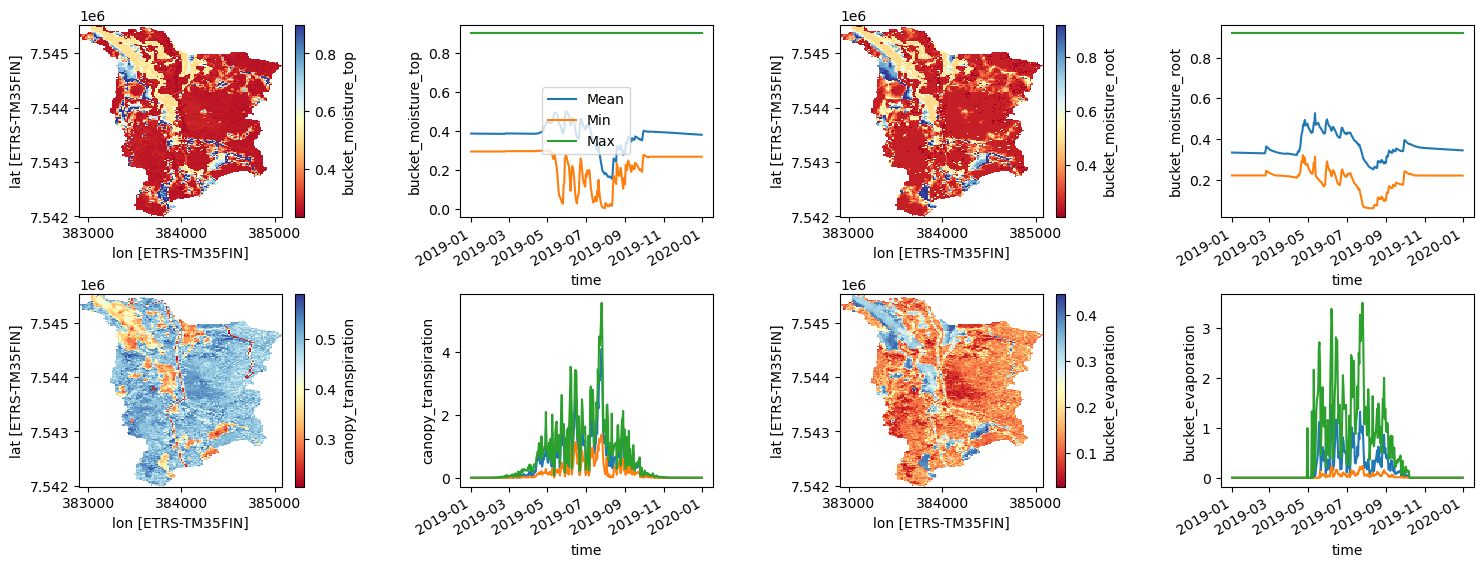

In [3]:
# example plot 1 (works for 1D, TOP, or 2D simulation)

fig, axes = plt.subplots(2, 4, figsize=(18, 6))  # 2 rows, 4 columns
axes = axes.flatten()  # Flatten to easily index 0–7

# Plot 1
results['bucket_moisture_top'].mean(dim='time').plot(ax=axes[0], cmap='RdYlBu')

# Plot 2
results['bucket_moisture_top'].mean(dim=['lat', 'lon']).plot(ax=axes[1], label='Mean')
results['bucket_moisture_top'].min(dim=['lat', 'lon']).plot(ax=axes[1], label='Min')
results['bucket_moisture_top'].max(dim=['lat', 'lon']).plot(ax=axes[1], label='Max')
axes[1].legend()
# Plot 3
results['bucket_moisture_root'].mean(dim='time').plot(ax=axes[2], cmap='RdYlBu')

# Plot 4
results['bucket_moisture_root'].mean(dim=['lat', 'lon']).plot(ax=axes[3], label='Mean')
results['bucket_moisture_root'].min(dim=['lat', 'lon']).plot(ax=axes[3], label='Min')
results['bucket_moisture_root'].max(dim=['lat', 'lon']).plot(ax=axes[3], label='Max')

# Plot 5
results['canopy_transpiration'].mean(dim='time').plot(ax=axes[4], cmap='RdYlBu')

# Plot 6
results['canopy_transpiration'].mean(dim=['lat', 'lon']).plot(ax=axes[5], label='Mean')
results['canopy_transpiration'].min(dim=['lat', 'lon']).plot(ax=axes[5], label='Min')
results['canopy_transpiration'].max(dim=['lat', 'lon']).plot(ax=axes[5], label='Max')

# Plot 7
results['bucket_evaporation'].mean(dim='time').plot(ax=axes[6], cmap='RdYlBu')

# Plot 8
results['bucket_evaporation'].mean(dim=['lat', 'lon']).plot(ax=axes[7], label='Mean')
results['bucket_evaporation'].min(dim=['lat', 'lon']).plot(ax=axes[7], label='Min')
results['bucket_evaporation'].max(dim=['lat', 'lon']).plot(ax=axes[7], label='Max')

# Plot 8
#results['parameters_streams'].plot(ax=axes[7])

plt.subplots_adjust(wspace=0.5, hspace=0.4)  # Adjust spacing between plots

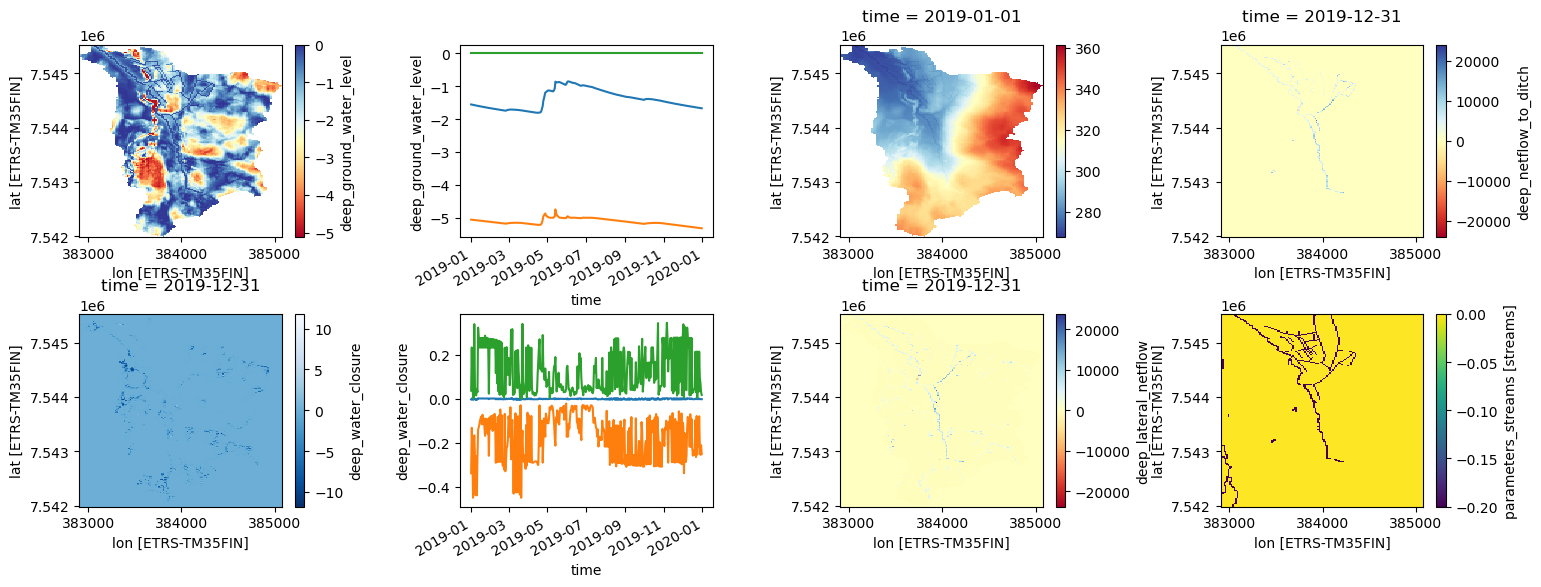

In [2]:
# example plot 2 (works only for 2D simulation)

fig, axes = plt.subplots(2, 4, figsize=(18, 6))  # 2 rows, 4 columns
axes = axes.flatten()  # Flatten to easily index 0–7

# Plot 1
results['deep_ground_water_level'].mean(dim='time').plot(ax=axes[0], cmap='RdYlBu')

# Plot 3
results['deep_ground_water_level'].mean(dim=['lat', 'lon']).plot(ax=axes[1], label='Mean')
results['deep_ground_water_level'].min(dim=['lat', 'lon']).plot(ax=axes[1], label='Min')
results['deep_ground_water_level'].max(dim=['lat', 'lon']).plot(ax=axes[1], label='Max')

# Plot 2
(results['parameters_elevation'] - results['deep_ground_water_level'][0]).plot(ax=axes[2], cmap='RdYlBu_r')

# Plot 4
#results['deep_netflow_to_ditch'][0].plot(ax=axes[3])
results['deep_netflow_to_ditch'].cumsum(dim='time')[-1].plot(ax=axes[3], cmap='RdYlBu')

# Plot 5
#results['deep_water_closure'][-1].plot(ax=axes[4])
results['deep_water_closure'].cumsum(dim='time')[-1].plot(ax=axes[4], cmap='Blues_r')

# Plot 6
results['deep_water_closure'].mean(dim=['lat', 'lon']).plot(ax=axes[5], label='Mean')
results['deep_water_closure'].min(dim=['lat', 'lon']).plot(ax=axes[5], label='Min')
results['deep_water_closure'].max(dim=['lat', 'lon']).plot(ax=axes[5], label='Max')

# Plot 7
#results['deep_lateral_netflow'].min(dim='time').plot(ax=axes[6])
results['deep_lateral_netflow'].cumsum(dim='time')[-1].plot(ax=axes[6], cmap='RdYlBu')

# Plot 8
results['parameters_streams'].plot(ax=axes[7])

plt.subplots_adjust(wspace=0.5, hspace=0.4)  # Adjust spacing between plots